In [1]:
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *



from qiskit_ibm_runtime import QiskitRuntimeService, Sampler, Estimator, Session, Options

# Loading IBM Quantum account(s)
service = QiskitRuntimeService(channel="ibm_quantum")


from qiskit.circuit.library import EfficientSU2
from qiskit.algorithms.optimizers import SPSA, COBYLA
from qiskit.algorithms import NumPyMinimumEigensolver
from qiskit.utils import QuantumInstance
from qiskit_optimization.algorithms import MinimumEigenOptimizer
from qiskit_optimization.converters import QuadraticProgramToQubo

# from qiskit_optimization.applications import Knapsack

from qiskit_nature.units import DistanceUnit
from qiskit_nature.second_q.drivers import PySCFDriver
from qiskit_nature.second_q.mappers import JordanWignerMapper, QubitConverter
from qiskit.algorithms.minimum_eigensolvers import NumPyMinimumEigensolver

from qiskit.algorithms.optimizers import SLSQP
from qiskit.primitives import Estimator, Sampler
from qiskit_nature.second_q.algorithms import VQEUCCFactory
from qiskit_nature.second_q.circuit.library import UCCSD

from qiskit.algorithms.minimum_eigensolvers import SamplingVQE
from qiskit.algorithms.minimum_eigensolvers import VQE
from qiskit.circuit.library import TwoLocal
from qiskit_nature.second_q.algorithms import GroundStateEigensolver

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np


import warnings
warnings.filterwarnings("ignore")

print("Libraries Imported Successfully!")

Libraries Imported Successfully!


In [2]:
'''
- finding the electronic structure of H2
- docu default distance suggests 0.735 Angstroms btwn atoms
'''
# https://qiskit.org/documentation/stable/0.31/stubs/qiskit.chemistry.drivers.PySCFDriver.html
# https://qiskit.org/ecosystem/nature/stubs/qiskit_nature.second_q.drivers.PySCFDriver.html

'\n- finding the electronic structure of H2\n- docu default distance suggests 0.735 Angstroms btwn atoms\n'

In [13]:
# denotes elements & coordinates of atoms in system  

# necessary to define vars for PySCFDriver if changing atom param
# turns out there's an easier way to dynamically change the syntax, see bottom cells

atom_symbol = 'H'
x1 = 0.0
y1 = 0.0
z1 = 0.0

x2 = 0.0
y2 = 0.0
z2 = 0.025

zeez = [0.735, 0.025, 0.05, 0.075, 0.1, 0.125, 0.15, 0.175, 0.2, 0.5, 0.6, 0.8, 0.9]

# for i in zeez:
#     z2=i
#     atom_parameter = f'{atom_symbol} {x1} {y1} {z1};{atom_symbol} {x2} {y2} {z2}'

#     print(i)
#     print(atom_parameter)


# driver = PySCFDriver(
#     atom=atom_parameter, 
#     basis="sto3g",
#     charge=0,
#     spin=0,
#     unit=DistanceUnit.ANGSTROM,)

probList = []

#for i in np.arange(0.0, 5.25, 1):
for i in zeez:
    
    z2 = i
    atom_parameter = f'{atom_symbol} {x1} {y1} {z1};{atom_symbol} {x2} {y2} {z2}'
    
    driver = PySCFDriver(
    atom=atom_parameter, 
    basis="sto3g",
    charge=0,
    spin=0,
    unit=DistanceUnit.ANGSTROM,)
    
    # Runs driver to produce a QMolecule output
    problem = driver.run()
    probList.append(problem)
    #print(problem)
    print("Distance between atoms = " + str(z2) + "\n")
    print("QMolecule output = " + str(problem) + "\n")
    print("Atom parameter = " + str(atom_parameter) + "\n")
    print("\n")    
    
# print(probList)

# all different distances btwn atoms
print("\nNumber of test cases: " + str(len(probList)) + "\n")



##for if you just want to test 0.735 angstroms btwn H atoms
# driver = PySCFDriver(
#     atom="H 0 0 0; H 0 0 0.735",
#     basis="sto3g",
#     charge=0,
#     spin=0,
#     unit=DistanceUnit.ANGSTROM,)
# problem = driver.run()
# print(problem)

# z2 = 0.5
# driver = PySCFDriver(
#     atom=atom_parameter, 
#     basis="sto3g",
#     charge=0,
#     spin=0,
#     unit=DistanceUnit.ANGSTROM,)
# print(atom_parameter)
# problem = driver.run()

Distance between atoms = 0.735

QMolecule output = <qiskit_nature.second_q.problems.electronic_structure_problem.ElectronicStructureProblem object at 0x7fb76a51b4f0>

Atom parameter = H 0.0 0.0 0.0;H 0.0 0.0 0.735



Distance between atoms = 0.025

QMolecule output = <qiskit_nature.second_q.problems.electronic_structure_problem.ElectronicStructureProblem object at 0x7fb76a51a020>

Atom parameter = H 0.0 0.0 0.0;H 0.0 0.0 0.025



Distance between atoms = 0.05

QMolecule output = <qiskit_nature.second_q.problems.electronic_structure_problem.ElectronicStructureProblem object at 0x7fb76a51ae30>

Atom parameter = H 0.0 0.0 0.0;H 0.0 0.0 0.05



Distance between atoms = 0.075

QMolecule output = <qiskit_nature.second_q.problems.electronic_structure_problem.ElectronicStructureProblem object at 0x7fb76a51a110>

Atom parameter = H 0.0 0.0 0.0;H 0.0 0.0 0.075



Distance between atoms = 0.1

QMolecule output = <qiskit_nature.second_q.problems.electronic_structure_problem.ElectronicStructureProb

In [14]:
# driver independent molecule definition (object)
# more info on the molecule 

problem.molecule
print(problem.molecule)
print("Reference energy: " + str(problem.reference_energy))
print("Particles: " + str(problem.num_particles))
print("Spatial Orbitals: " + str(problem.num_spatial_orbitals) + "\n")
print("Properties: " + str(problem.properties))


Molecule:
	Multiplicity: 1
	Charge: 0
	Unit: Bohr
	Geometry:
		H	(0.0, 0.0, 0.0)
		H	(0.0, 0.0, 1.7007535121085557)
	Masses:
		H	1
		H	1
Reference energy: -1.091914041020057
Particles: (1, 1)
Spatial Orbitals: 2

Properties: <qiskit_nature.second_q.problems.electronic_properties_container.ElectronicPropertiesContainer object at 0x7fb76335d210>


In [15]:
tunable_circuit = EfficientSU2(num_qubits = 2, reps = 1)
optimizer = COBYLA(maxiter=500)
method = VQE(ansatz = tunable_circuit, optimizer = optimizer, estimator = Estimator())


for i in probList:
    indx = probList.index(i)
    
    # method: vqe
    solver = GroundStateEigensolver(
        QubitConverter(JordanWignerMapper()), method)
    
    # returns minimum eigensolver or factory
    result = solver.solve(probList[indx])
    print("Total energy = ", result.total_energies)
    
    # verifying through exact (guaranteed) solver
    method = NumPyMinimumEigensolver()
    exact_result = solver.solve(problem)
    print("Total energy = ", exact_result.total_energies)

    # error
    print("Error % = " + str((exact_result.total_energies - result.total_energies)/(exact_result.total_energies)*100))
    print("\n")
    
# print(probList)

Total energy =  [-1.11699895]
Total energy =  [-0.68284939]
Error % = [-63.57910864]


Total energy =  [18.55193541]
Total energy =  [-1.12056028]
Error % = [1755.59459168]


Total energy =  [7.97524101]
Total energy =  [-1.12056028]
Error % = [811.71905204]


Total energy =  [4.45860427]
Total energy =  [-1.12056028]
Error % = [497.89062165]


Total energy =  [2.70996077]
Total energy =  [-1.12056028]
Error % = [341.83980247]


Total energy =  [1.6705755]
Total energy =  [-1.12056028]
Error % = [249.08394721]


Total energy =  [0.9872194]
Total energy =  [-1.12056028]
Error % = [188.10051697]


Total energy =  [0.50821782]
Total energy =  [-1.12056028]
Error % = [145.35390301]


Total energy =  [0.15748213]
Total energy =  [-1.12056028]
Error % = [114.05387443]


Total energy =  [-1.05515979]
Total energy =  [-1.12056028]
Error % = [5.83640951]


Total energy =  [-1.11628601]
Total energy =  [-1.12056028]
Error % = [0.38144083]


Total energy =  [-1.13414767]
Total energy =  [-1.12056

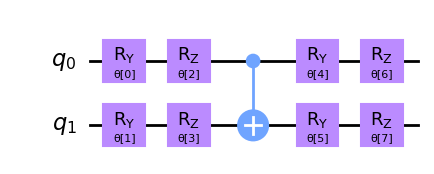

In [16]:
# defining tunable circuit with EfficientSU2
# mapping atoms to qubits - qubits associated w/atoms or particle positions
# each qubit represents the state of an atom or particle 
tunable_circuit = EfficientSU2(num_qubits = 2, reps = 1)

# classical optimizer utilizing COBYLA algorithm - 500 function evals
# employs linear approximations to objective &n contraint functions
# https://qiskit.org/documentation/stubs/qiskit.algorithms.optimizers.COBYLA.html
optimizer = COBYLA(maxiter=500)

# https://qiskit.org/documentation/stubs/qiskit.algorithms.VQE.html
method = VQE(ansatz = tunable_circuit, optimizer = optimizer, estimator = Estimator())

tunable_circuit.decompose().draw()

In [17]:
# https://qiskit.org/documentation/stable/0.25/stubs/qiskit.chemistry.algorithms.GroundStateEigensolver.html
# finding energy of structure

# method: vqe
solver = GroundStateEigensolver(
    QubitConverter(JordanWignerMapper()), method)

# result = solver.solve(problem)
# print("Total energy = ", result.total_energies)

print(probList[0])
result = solver.solve(probList[0])
print("Distance between H atoms = ", zeez[0])
print("Total energy = ", result.total_energies)

# result = solver.solve(probList[1])
# print("Distance between H atoms = ", zeez[1])
# print("Total energy = ", result.total_energies)

# result = solver.solve(probList[5])
# print("Distance between H atoms = ", zeez[5])
# print("Total energy = ", result.total_energies)

#printing all 210 results
# for i in range(len(probList)):
#     # result = solver.solve(probList[i])
#     # print("Total energy = ", result.total_energies)
#     # print(probList[i])


Distance between H atoms =  0.735
Total energy =  [-1.13616195]


In [18]:
# https://qiskit.org/ecosystem/nature/howtos/numpy_minimum_eigensolver.html
# verifying through exact (guaranteed) solver

method = NumPyMinimumEigensolver()

exact_result = solver.solve(problem)
print("Total energy = ", exact_result.total_energies)

# error
print("Error % = " + str((exact_result.total_energies - result.total_energies)/(exact_result.total_energies)*100))

Total energy =  [-1.12055994]
Error % = [-1.39234045]


In [19]:
'''
- tweak tunable circuit so total energy's closer to exact solu
- least num of reps still giving good mattch w/exact sol
- result from more reps - errors
- distance changing btwn atoms - what dist minimizes total energy
'''

"\n- tweak tunable circuit so total energy's closer to exact solu\n- least num of reps still giving good mattch w/exact sol\n- result from more reps - errors\n- distance changing btwn atoms - what dist minimizes total energy\n"

In [20]:
tunable_circuit = EfficientSU2(num_qubits = 2, reps = 1, entanglement='full')
optimizer = COBYLA(maxiter=500)
vqe_calc = GroundStateEigensolver(QubitConverter(JordanWignerMapper()), VQE(ansatz = tunable_circuit, optimizer = optimizer, estimator = Estimator()))


exact_calc = GroundStateEigensolver(QubitConverter(JordanWignerMapper()), NumPyMinimumEigensolver())


exact_energies = []
vqe_energies = []
distances = [0.1,0.3,0.5,0.7,0.9,1.1,1.3,1.5,1.7,1.9,2.1,2.3,2.5]

In [21]:
for i in range(len(distances)):

    # Set up the problem for this distance
    dist = distances[i]
    driver = PySCFDriver(
    atom="H 0 0 0; H 0 0 " + str(dist),
    basis="sto3g",
    charge=0,
    spin=0,
    unit=DistanceUnit.ANGSTROM,)

    problem = driver.run()


    # Solve exactly
    exact_result = exact_calc.solve(problem)
    exact_energies.append(result.total_energies)

    # Solve with VQE
    vqe_result = vqe_calc.solve(problem)
    vqe_energies.append(vqe_result.total_energies)


    print("Completed", i+1, "out of", str(len(distances)), "calculations")
    print("Exact result: \n" + str(exact_result))
    print("\nVQE result: " + str(vqe_result) + "\n")

Completed 1 out of 13 calculations
Exact result: 
=== GROUND STATE ENERGY ===
 
* Electronic ground state energy (Hartree): -2.581811338333
  - computed part:      -2.581811338333
~ Nuclear repulsion energy (Hartree): 5.2917721092
> Total ground state energy (Hartree): 2.709960770867
 
=== MEASURED OBSERVABLES ===
 
  0:  # Particles: 2.000 S: 0.000 S^2: 0.000 M: 0.000
 
=== DIPOLE MOMENTS ===
 
~ Nuclear dipole moment (a.u.): [0.0  0.0  0.18897261]
 
  0: 
  * Electronic dipole moment (a.u.): [0.0  0.0  0.188972612457]
    - computed part:      [0.0  0.0  0.188972612457]
  > Dipole moment (a.u.): [0.0  0.0  -0.000000002457]  Total: 0.000000002457
                 (debye): [0.0  0.0  -0.000000006244]  Total: 0.000000006244
 

VQE result: === GROUND STATE ENERGY ===
 
* Electronic ground state energy (Hartree): -2.575884193499
  - computed part:      -2.575884193499
~ Nuclear repulsion energy (Hartree): 5.2917721092
> Total ground state energy (Hartree): 2.715887915701
 
=== MEASURED OB

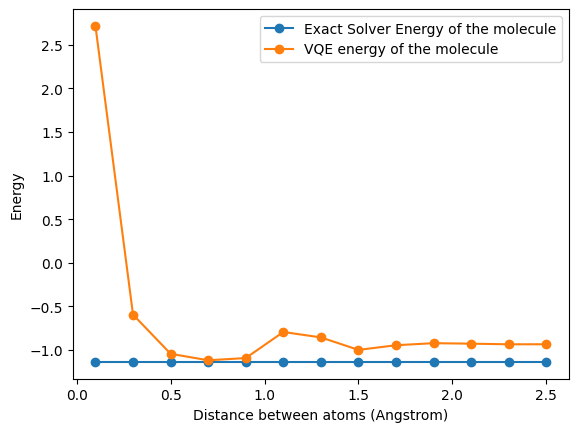

In [22]:
plt.plot(distances, exact_energies, distances, vqe_energies, marker = "o")
plt.xlabel('Distance between atoms (Angstrom)')
plt.ylabel('Energy')
plt.legend(['Exact Solver Energy of the molecule','VQE energy of the molecule'])
plt.show()